<a href="https://colab.research.google.com/github/babelPish/slaw/blob/master/spacy_basic/colab_notebooks/05_working_with_word_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5. Woking with word vectors
* 바벨피쉬 : Slaw - Spacy 기초
* 김무성

In [1]:
!python -V

Python 3.6.9


In [2]:
# 버전이 2.2.4 일것. 이 버전에 맞춰서 korean word2vec 실습모델 셋팅함.
import spacy
spacy.__version__ 

'2.2.4'

-------------

# Installation

#### spaCy Lanage Models

In [165]:
# 이미 기본 en 모델은 다운로드 되어 있으나, 혹시 없으면
# !python -m spacy -m en 

#### 시각화 도구
* 구글 Colab에서 한글 문제 대응하기 - https://pinkwink.kr/1255
* https://rasahq.github.io/whatlies/
* https://spacy.io/universe/project/whatlies

In [178]:
# -- 한글폰트 지원을 위한 설치
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144616 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [110]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [111]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['NanumBarunGothic'], 설정 폰트 사이즈: 10.0


In [ ]:
# -- whatlies
!pip install whatlies

#### 한국어 지원

In [ ]:
#spacy는 현재 colab에서는 기본 설치되어 있다. 한국어 지원만 다음 과정을 따르면 된다.

In [7]:
# 한국어 형태소 분석을 위한 mecab-ko 설치가 필요하다.
#remove " > /dev/null 2>&1" to see what is going on under the hood
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git > /dev/null 2>&1

In [9]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [11]:
!bash install_mecab-ko_on_colab190912.sh > /dev/null 2>&1

In [12]:
# natto-py를 설치해야 mecab-ko를 spaCy에 연동가능하다.
!pip install natto-py > /dev/null 2>&1

In [1]:
# 한국어 처리 가능여부 테스트. 이 코드가 제대로 실행되면 spaCy 한국어 지원이 제대로 된 것이다.
from spacy.lang.ko import Korean

nlp_ko = Korean()

doc = nlp_ko(u'이것은 문장이다') #Creates a Doc object 

for token in doc:  
    print(token.text, token.pos_, token.tag_) #prints the text and POS

이것 PRON NP
은 ADP JX
문장 NOUN NNG
이 ADP VCP
다 X EC


In [49]:
cd /content

/content


---------

-------------

# Pretrained 한국어 Word2Vec을 spaCy에서 사용하기

#### 참고 
* spaCy official doc. Word Vectors and Semantic Similarity - https://spacy.io/usage/vectors-similarity
* gensim official doc. models.keyedvectors – Store and query word vectors - https://radimrehurek.com/gensim/models/keyedvectors.html
* GENSIM WORD2VEC SIMPLE USAGE - https://gorakgarak.tistory.com/1330
* 딥 러닝을 이용한 자연어 처리 입문 - 영어/한국어 Word2Vec 실습 WikiDocs
3) 영어/한국어 Word2Vec 실습 - https://wikidocs.net/50739
* Pre-trained word vectors of 30+ languages - https://github.com/Kyubyong/wordvectors

#### spaCy 모델로 만들기

In [26]:
!git clone https://github.com/babelPish/slaw.git

Cloning into 'slaw'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.


In [5]:
ls

mecab-0.996-ko-0.9.2/         mecab-ko-dic-2.1.1-20180720.tar.gz  slaw/
mecab-0.996-ko-0.9.2.tar.gz   Mecab-ko-for-Google-Colab/
mecab-ko-dic-2.1.1-20180720/  sample_data/


In [50]:
cd /content/slaw/spacy_basic/colab_notebooks/

/content/slaw/spacy_basic/colab_notebooks


In [51]:
ls

05_working_with_word_vectors.ipynb  models/


In [52]:
cd models

/content/slaw/spacy_basic/colab_notebooks/models


In [31]:
ls

ko_wv/


In [53]:
cd ko_wv

/content/slaw/spacy_basic/colab_notebooks/models/ko_wv


In [34]:
ls

ko.zip


In [35]:
!unzip ko.zip

Archive:  ko.zip
  inflating: ko.bin                  
  inflating: ko.tsv                  


In [36]:
import gensim

In [37]:
model = gensim.models.Word2Vec.load('ko.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [39]:
kv = model.wv

In [40]:
kv.save_word2vec_format('ko_wv.embd', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [56]:
ls

ko.bin  ko.tsv  ko_wv.embd  ko_wv.spacy.embd/  ko.zip


In [42]:
!python -m spacy init-model ko ko_wv.spacy.embd --vectors-loc ko_wv.embd

✔ Successfully created model
30185it [00:01, 17350.54it/s]
✔ Loaded vectors from ko_wv.embd
✔ Sucessfully compiled vocab
30185 entries, 30185 vectors


In [52]:
ls

ko.bin  ko.tsv  ko_wv.embd  ko_wv.spacy.embd/  ko.zip


In [56]:
ls ko_wv.spacy.embd

meta.json  vocab/


#### 만들어진 모델 로드해서 사용하기

In [57]:
nlp_ko_wv = spacy.load('ko_wv.spacy.embd')

/usr/lib/python3.6/runpy.py:193: UserWarning: [W019] Changing vectors name from ko_model.vectors to ko_model.vectors_30185, to avoid clash with previously loaded vectors. See Issue #3853.
  "__main__", mod_spec)


In [58]:
doc1 = nlp_ko_wv('안녕하세요') 

In [59]:
doc2 = nlp_ko_wv('안녕')

In [60]:
doc3 = nlp_ko_wv('반갑다')

In [61]:
doc4 = nlp_ko_wv('강아지')

In [99]:
doc5 = nlp_ko_wv('겔럭시')

In [100]:
doc6 = nlp_ko_wv('갤럭시')

In [64]:
doc1.similarity(doc1)

1.0

In [65]:
doc1.similarity(doc2)

0.3767422436269971

In [66]:
doc1.similarity(doc3)

0.06939425105226041

In [67]:
doc1.similarity(doc4)

-0.038436487747098264

In [101]:
doc5.similarity(doc6)

0.2627900996926142

#### 시각화

#### 참고
* https://www.kaggle.com/zackakil/
* https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

In [167]:
cd /content

/content


In [ ]:
# 임베딩 벡터 시각화

In [102]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

In [103]:
import matplotlib.pyplot as plt

In [104]:
def get_word_vectors(words, nlp):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

In [105]:
# -- pca로 2차원으로 만들어서 비교

In [106]:
words = ['개', '고양이', '고냥이', '호랑이', '물고기', '어항', '서울', '부산', '소년', '소녀', '남자', '여자', '왕', '여왕']

In [107]:
pca = PCA(n_components=2)

word_vecs_2d = pca.fit_transform(get_word_vectors(words, nlp_ko_wv))

In [108]:
# let's look at our new 2D word vectors
word_vecs_2d

array([[ 7.51909943,  0.47106581],
       [-4.69819873, -0.54879635],
       [ 0.87500346, -0.24064316],
       [-1.29240752, -1.05716794],
       [-2.64911632,  1.42994065],
       [14.45743627,  8.33634248],
       [ 9.25201635, -5.91781758],
       [10.20388686, -5.88343749],
       [-4.61270903, -3.87502227],
       [-8.16568907, -6.56297332],
       [-6.47427034, -3.95685503],
       [-3.58626192, -4.37619559],
       [-5.75349598, 13.89557785],
       [-5.07529345,  8.28598194]])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


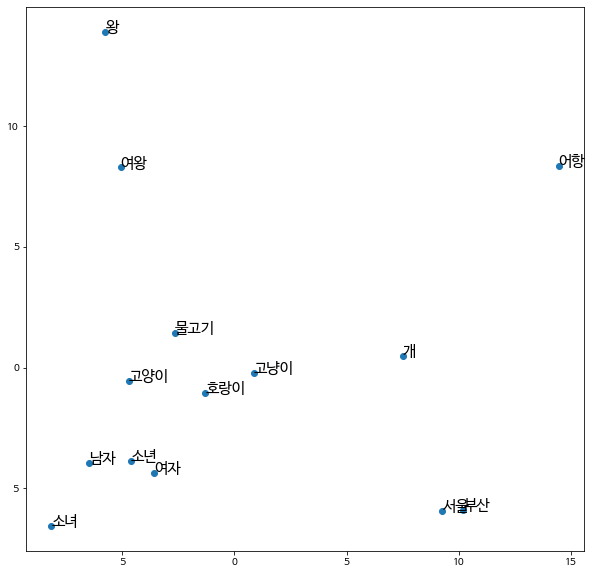

In [112]:
# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

In [113]:
from sklearn.manifold import TSNE

In [114]:
tsne = TSNE(n_components=2) 

word_vecs_2d_tsne = tsne.fit_transform(get_word_vectors(words, nlp_ko_wv))

In [115]:
word_vecs_2d_tsne

array([[ -96.309845 ,   65.07963  ],
       [   8.538019 ,  147.75122  ],
       [  83.11923  , -161.95361  ],
       [-115.99335  ,  -36.7991   ],
       [-143.78087  , -158.3079   ],
       [-120.835625 ,  170.68573  ],
       [ -34.738655 ,  -97.6543   ],
       [-226.46414  ,  -66.57293  ],
       [ -32.60427  , -212.06679  ],
       [  -4.4332743,   27.748274 ],
       [  57.362602 ,  -49.7873   ],
       [ 107.49638  ,   73.48905  ],
       [-211.04265  ,   58.584644 ],
       [ 165.65916  ,  -44.52259  ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


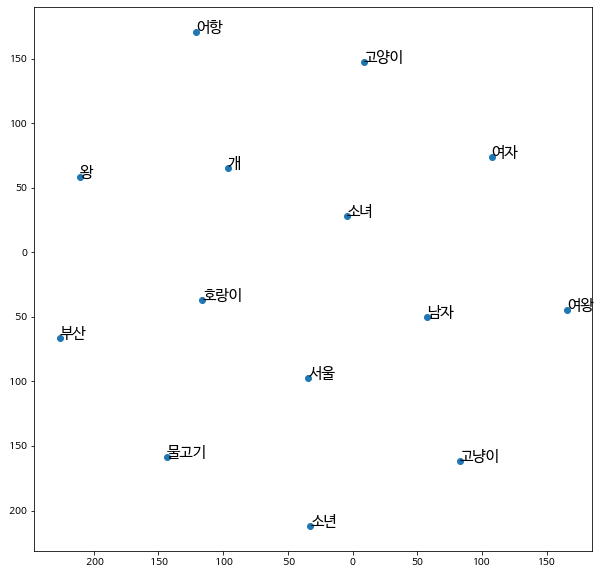

In [116]:
# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d_tsne[:,0], word_vecs_2d_tsne[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d_tsne):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

#### 참고
* https://rasahq.github.io/whatlies/
* https://spacy.io/universe/project/whatlies

In [ ]:
# whatlies 사용해보기

In [117]:
from whatlies import EmbeddingSet
from whatlies.language import SpacyLanguage

In [119]:
ls /content/slaw/spacy_basic/colab_notebooks/models/ko_wv_spacy

ko_wv.spacy.embd/


In [120]:
vm_ko_path = "/content/slaw/spacy_basic/colab_notebooks/models/ko_wv_spacy/ko_wv.spacy.embd"

In [121]:
lang = SpacyLanguage(vm_ko_path)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W019] Changing vectors name from ko_model.vectors to ko_model.vectors_30185, to avoid clash with previously loaded vectors. See Issue #3853.
  "__main__", mod_spec)


In [122]:
words = ['개', '고양이', '고냥이', '호랑이', '물고기', '어항', '서울', '부산', '소년', '소녀', '남자', '여자', '왕', '여왕']

In [123]:
emb = lang[words]
emb.plot_interactive(x_axis='남자', y_axis='여자')

alt.LayerChart(...)

------------

# Pretrained 한국어 FastText를 spaCy에서 사용하기.
* 참고 
  - FastText Pre-trained 한국어 모델 사용기 -https://inahjeon.github.io/fasttext/
  - Word2Vec & FastText  - https://inspiringpeople.github.io/data%20analysis/word_embedding/

In [70]:
cd /content/slaw/spacy_basic/colab_notebooks/models/

/content/slaw/spacy_basic/colab_notebooks/models


In [ ]:
mkdir ko_ft

In [71]:
cd ko_ft

/content/slaw/spacy_basic/colab_notebooks/models/ko_ft


In [15]:
!wget https://www.dropbox.com/s/stt4y0zcp2c0iyb/ko.tar.gz

--2020-06-27 14:33:05--  https://www.dropbox.com/s/stt4y0zcp2c0iyb/ko.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/stt4y0zcp2c0iyb/ko.tar.gz [following]
--2020-06-27 14:33:05--  https://www.dropbox.com/s/raw/stt4y0zcp2c0iyb/ko.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc495d1f19ad52bf808cd6e1d6fa.dl.dropboxusercontent.com/cd/0/inline/A6fDmDlSL3AnfY66om8kENiUkeIYBcBX1gIhY7rds_mjRxNLxf_jtIqd-e2hr2O1pH7kPROLqFH0QJup0L5NpmXI9LKhon_YTdkmGpvSldM8tQ/file# [following]
--2020-06-27 14:33:05--  https://uc495d1f19ad52bf808cd6e1d6fa.dl.dropboxusercontent.com/cd/0/inline/A6fDmDlSL3AnfY66om8kENiUkeIYBcBX1gIhY7rds_mjRxNLxf_jtIqd-e2hr2O1pH7kPROLqFH0QJup0L5NpmXI9LKhon_YTdkmGpvSldM8tQ/file
Resolving uc495d1f19ad52bf80

In [17]:
!tar xvfz ko.tar.gz

ko.bin
ko.vec


In [18]:
ls

ko.bin  ko.tar.gz  ko.vec


In [19]:
# 기본 3.6.0 이다.
import gensim
gensim.__version__

'3.6.0'

In [20]:
model = gensim.models.FastText.load_fasttext_format('ko.bin', encoding='utf8')

In [22]:
kv = model.wv
kv.save_word2vec_format('ko_ft.embd', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [23]:
ls

ko.bin  ko_ft.embd  ko.tar.gz  ko.vec


In [24]:
!python -m spacy init-model ko ko_ft.spacy.embd --vectors-loc ko_ft.embd

✔ Successfully created model
30186it [00:01, 17396.02it/s]
✔ Loaded vectors from ko_ft.embd
✔ Sucessfully compiled vocab
30186 entries, 30186 vectors


In [25]:
ls

ko.bin  ko_ft.embd  ko_ft.spacy.embd/  ko.tar.gz  ko.vec


In [72]:
nlp_ko_ft = spacy.load('ko_ft.spacy.embd')

In [97]:
doc1 = nlp_ko_ft('안녕하세요') 

doc2 = nlp_ko_ft('안녕')

doc3 = nlp_ko_ft('반갑다')

doc4 = nlp_ko_ft('강아지')

doc5 = nlp_ko_ft('겔럭시')

doc6 = nlp_ko_ft('갤럭시')

In [74]:
doc1.similarity(doc1)

1.0

In [75]:
doc1.similarity(doc2)

0.7138457031786868

In [76]:
doc1.similarity(doc3)

0.4877349430003921

In [77]:
doc1.similarity(doc4)

0.17381218978767257

In [98]:
doc5.similarity(doc6)

0.5286222579943097

In [124]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

def get_word_vectors(words, nlp):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]



In [125]:
words = ['개', '고양이', '고냥이', '호랑이', '물고기', '어항', '서울', '부산', '소년', '소녀', '남자', '여자', '왕', '여왕']


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


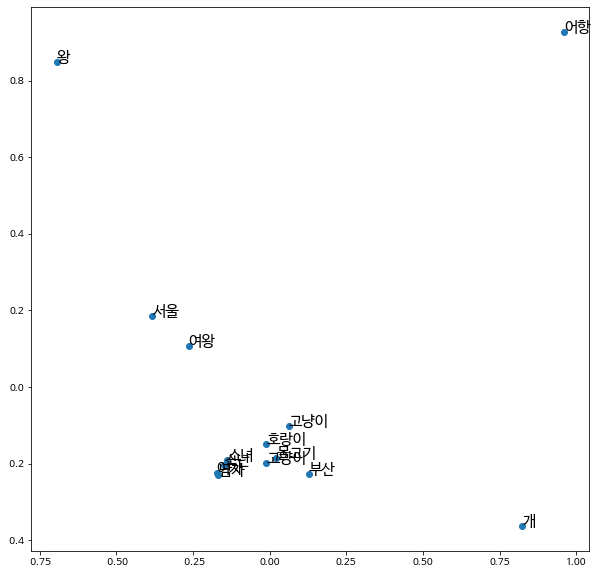

In [126]:
pca = PCA(n_components=2)

word_vecs_2d = pca.fit_transform(get_word_vectors(words, nlp_ko_ft))

# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

In [128]:
ls -al

total 3240904
drwxr-xr-x 3 root root       4096 Jun 27 14:38 ./
drwxr-xr-x 6 root root       4096 Jun 27 12:42 ../
-rw-rw-r-- 1 1000 1000 1648815483 Feb 27  2017 ko.bin
-rw-r--r-- 1 root root   73354641 Jun 27 14:36 ko_ft.embd
drwxr-xr-x 3 root root       4096 Jun 27 14:38 ko_ft.spacy.embd/
-rw-r--r-- 1 root root 1543812655 Jun 27 14:33 ko.tar.gz
-rw-rw-r-- 1 1000 1000   52677684 Feb 27  2017 ko.vec


In [129]:
ls ../


ko_ft/  ko_wv/  ko_wv_gensim/  ko_wv_spacy/


In [135]:
cp -r ko_ft/ko_ft.embd ko_ft_gensim/

In [136]:
ls ko_ft_gensim/

ko_ft.embd


In [138]:
!git pull

remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
From https://github.com/babelPish/slaw
   e405f6e..e793bd7  master     -> origin/master
Updating e405f6e..e793bd7
Fast-forward
 .../05_working_with_word_vectors.ipynb             | 834 ++++++++++++++++++++-
 1 file changed, 804 insertions(+), 30 deletions(-)
